In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%run "strategy.ipynb"

preperation complete!


In [3]:
# create new dataframe to store the results with cols dates blocks closing prices money 
results = pd.DataFrame(columns=['dates', 'blocks', 'closing_prices', 'money'])

In [8]:
bank = 5000000
new_bank = 5000000
count = 0
count_total = 0


In [9]:
for block in EURUSD_filtered["Block"].unique():
    block_data = EURUSD_filtered[EURUSD_filtered["Block"] == block]
    mutex = 0
    for t in range(96, len(block_data)):
        count_total += 1
        # fit model to the last 96 closing prices of the block
        block_data_last_day = block_data.iloc[t-96:t]
        model, X, Y = fit_model(block_data_last_day)

        mutex, new_bank = revert_to_the_mean(block_data.iloc[t], model, X, Y, mutex, bank)
        if new_bank != bank:
            bank = new_bank
            # store the results in the results dataframe
            new_row = pd.DataFrame({
                'dates': [block_data.iloc[t]["Dates"]],  # Wrap scalar in list
                'blocks': [block],  # Wrap scalar in list
                'closing_prices': [block_data.iloc[t]["Close"]],  # Wrap scalar in list
                'money': [bank]  # Wrap scalar in list
            })
            results = pd.concat([results, new_row], ignore_index=True)
            # print(bank)


    if mutex == 1:
        new_bank = bank * (1/block_data.iloc[t]["Close"])
        # print("Sell", (1/block_data.iloc[t]["Close"]) * bank, "€", block_data.iloc[t]["Dates"], block_data.iloc[t]["Close"], "end of block")
        if new_bank != bank:
            bank = new_bank
            # store the results in the results dataframe
            new_row = pd.DataFrame({
                'dates': [block_data.iloc[t]["Dates"]],  # Wrap scalar in list
                'blocks': [block],  # Wrap scalar in list
                'closing_prices': [block_data.iloc[t]["Close"]],  # Wrap scalar in list
                'money': [bank]  # Wrap scalar in list
            })
            results = pd.concat([results, new_row], ignore_index=True)
        

In [10]:
print("Percentage of closing prices outside the confidence interval:", len(results)/count_total)
print("Bank:", bank)
print("Trades:", len(results))

Percentage of closing prices outside the confidence interval: 0.06498262747675838
Bank: 4943978.478045991
Trades: 692


In [24]:
results.tail()

,dates,blocks,closing_prices,money
687,2024-04-17 03:15:00,29,1.0628,4.945374e+06
688,2024-04-17 03:30:00,29,1.0625,5.254460e+06
689,2024-04-17 03:45:00,29,1.0628,4.943978e+06
690,2024-04-17 06:30:00,29,1.0625,5.252977e+06
691,2024-04-17 08:30:00,29,1.0625,4.943978e+06


In [30]:
# take the last element in results
last_element = results.iloc[-1]
last_element["closing_prices"] * last_element["money"]


5252977.132923865

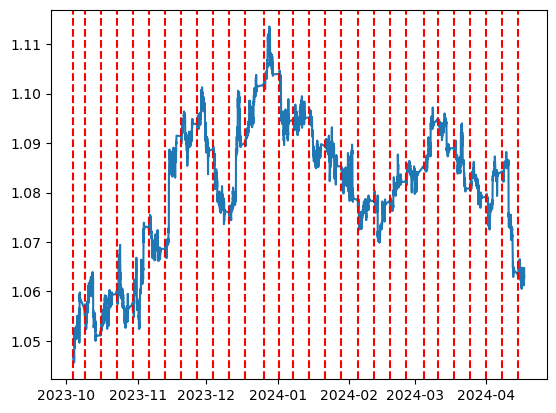

In [12]:
# plot all closing prices against the dates
plt.plot(EURUSD_filtered["Dates"], EURUSD_filtered["Close"])
# since there are jumps in the seperate each block by a vertical red line
for block in EURUSD_filtered["Block"].unique():
    block_data = EURUSD_filtered[EURUSD_filtered["Block"] == block]
    plt.axvline(x=block_data.iloc[0]["Dates"], color='r', linestyle='--')

# plot the money against the dates in green


In [15]:
# make a subset of every second entry in the results dataframe to plot the trades
results_subset = results.iloc[::2, :]
# and the complimentary subset for the money
results_subset_compl = results.iloc[1::2, :]


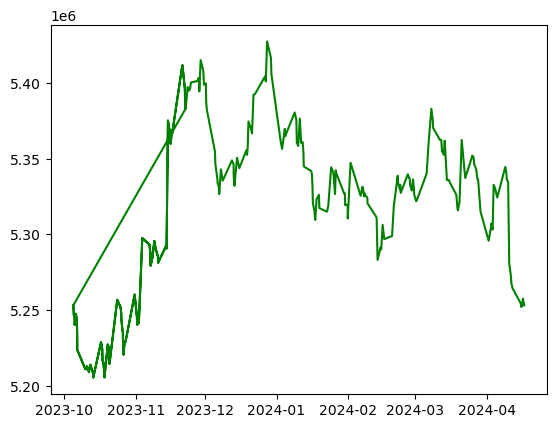

In [17]:
# for the results_subset plot the money against the dates
plt.plot(results_subset["dates"], results_subset["money"], 'g') 

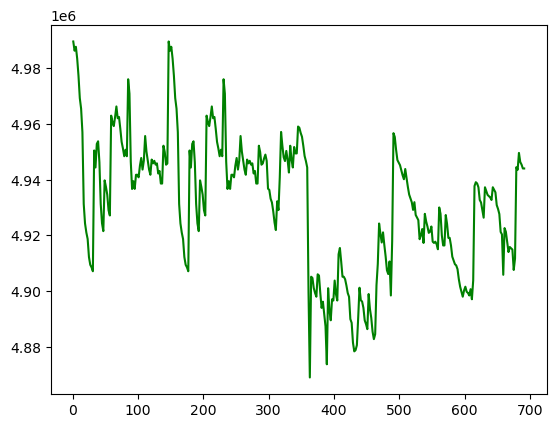

In [23]:
# for the results_subset_compl plot the trades against the dates
plt.plot(results_subset_compl.index, results_subset_compl["money"], 'g')

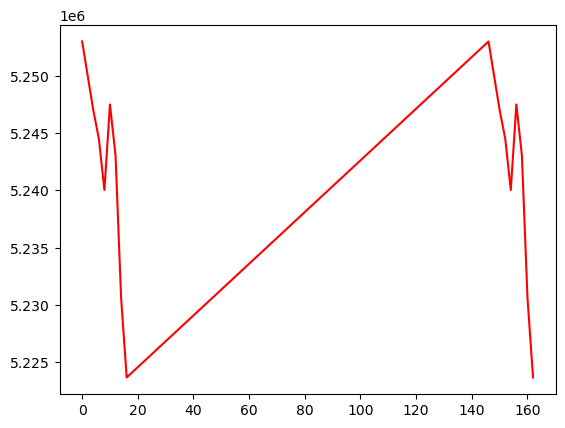

In [22]:
# only select block 1 trades from the results_subset
results_subset_block1 = results_subset[results_subset["blocks"] == 1]
# plot money against indext for block 1
plt.plot(results_subset_block1.index, results_subset_block1["money"], 'r')